<a href="https://colab.research.google.com/github/jwdagney55/DSPS_JDagney/blob/main/HW2/HW2_2CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [86]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [92]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq', 'gaus', 'pois', 'binomial', 'lnorm'];


## and which *population* mean to give it (it will be the same for each distribution)

In [63]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](https://raw.githubusercontent.com/fedhere/DSPS_2019/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_2019/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [64]:
# the chi sq distribution takes the number of degrees of freedom, 
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution of 100 elements

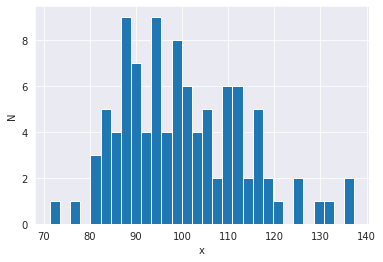

In [5]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
mydists = {}
# mydists is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom. 

## let numpy calculate what the mean and stdev of this distribution are

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(np.mean(mydists['chisq'][100]), np.std(mydists['chisq'][100])))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes 

In [87]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


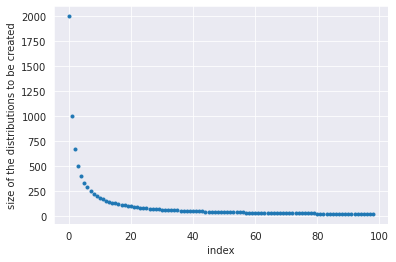

In [88]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

Text(1259.3999999999999, 100, 'expected mean')

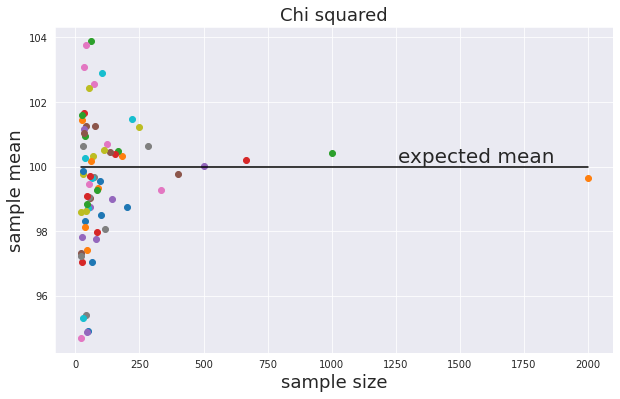

In [90]:
# fill dictionary in in a for loop. not pythonic, but easily readable
np.random.seed(111);
for n in mysize:
    mydists[distributions[0]][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100
    
# save the means for plotting later    

mydists[distributions[0]]['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists[distributions[0]]:
    if not type(nn) == str: # needed because one element is "mean"
        mydists[distributions[0]]['means'][nn] = mydists[distributions[0]][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists[distributions[0]]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

### Figure 2: At smaller sample sizes there is a larger spread in the sample mean and large sample sizes have less of a spread, forming a gaussian distribution (rotated 90degrees clockwise). This follows the law of large numbers where the mean of the sample tends towards the mean of the population as the sample size increases to infinity.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0, 0.5, 'N')

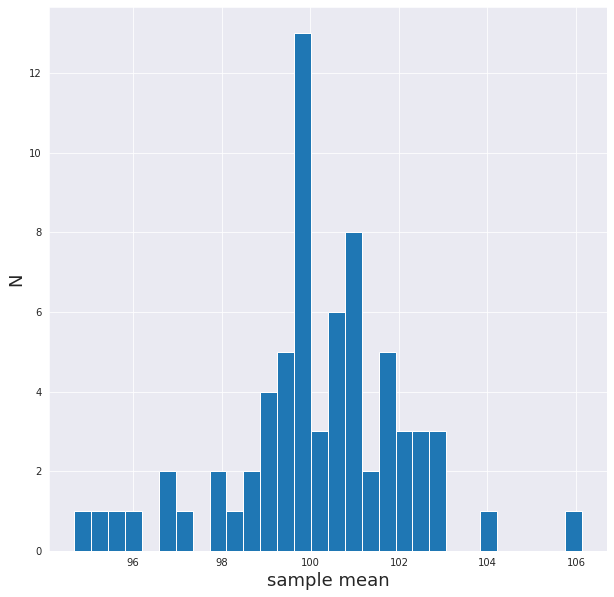

In [10]:
allmeans = list(mydists[distributions[1]]['means'].values())


pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: Histogram of Chi-squared distribution. We can see a gaussian form around the sample mean of 100.

# Do it for the Normal distribution


Text(1259.3999999999999, 100, 'expected mean')

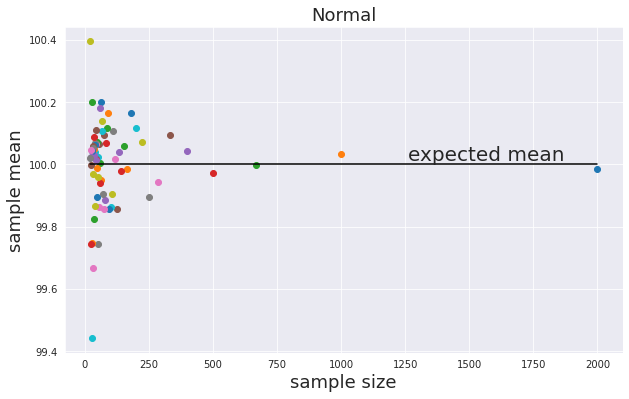

In [105]:
##your code here...
np.random.seed(222);
mydists[distributions[1]] = {};
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
for n in mysize:
    mydists[distributions[1]][n] = np.random.normal(100.0, size=n) #all distributions have mean=df=100
    
# save the means for plotting later    

mydists[distributions[1]]['means'] = {}
# prepare the figure
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists[distributions[1]]:
    if not type(nn) == str: # needed because one element is "mean"
        mydists[distributions[1]]['means'][nn] = mydists[distributions[1]][nn].mean()
        #and plot it
        axnorm_mu_n.plot(nn, mydists[distributions[1]]['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
axnorm_mu_n.set_title("Normal", fontsize=18)
axnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axnorm_mu_n.text(axnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

##Figure 4: We see a gaussian distribution around the expected mean of 100 for the normal distribution with input parameter $\mu = 100$ and $\sigma = 1$. There is a large spread away from the expected mean of sample means at lower sample sizes, and a closer spread at large sample sizes, again following the law of large numbers.

# Do it for the Poisson distribution

Text(1259.3999999999999, 100, 'expected mean')

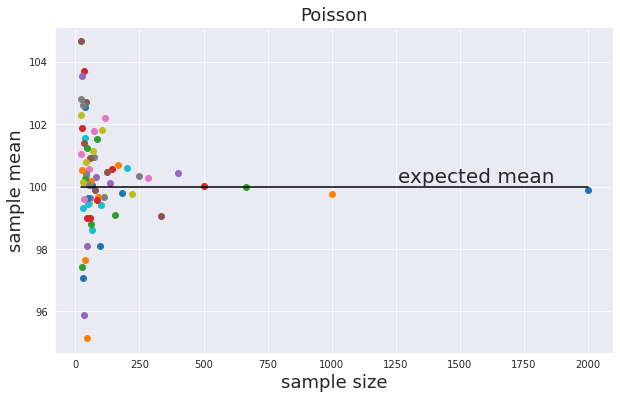

In [100]:
##your code here...
np.random.seed(333);
mydists[distributions[2]] = {};
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
for n in mysize:
    mydists[distributions[2]][n] = np.random.poisson(100.0, size=n) #all distributions have mean=df=100
    
# save the means for plotting later    

mydists[distributions[2]]['means'] = {}
# prepare the figure
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists[distributions[2]]:
    if not type(nn) == str: # needed because one element is "mean"
        mydists[distributions[2]]['means'][nn] = mydists[distributions[2]][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, mydists[distributions[2]]['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
axpois_mu_n.set_title('Poisson', fontsize=18)
axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

## Figure 5 Another gaussian forming around the expected mean of the Poisson Distribution with input parameter $\lambda = 100$.

# Do it for the Binomial distribution

Text(12593.94, 100, 'expected mean')

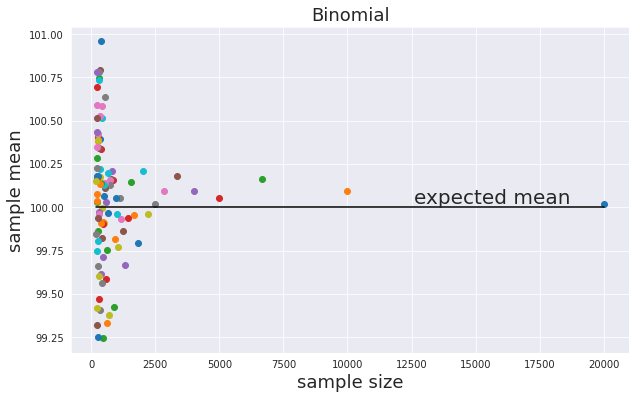

In [101]:
##your code here...
np.random.seed(444);
mydists[distributions[3]] = {};
mysize = (20000 / (np.array(range(1, 100)))).astype(int);
for n in mysize:
    mydists[distributions[3]][n] = np.random.binomial(300, 100/300.0, n ) #all distributions have mean=df=100
# save the means for plotting later    

mydists[distributions[3]]['means'] = {}
# prepare the figure
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists[distributions[3]]:
    if not type(nn) == str: # needed because one element is "mean"
        mydists[distributions[3]]['means'][nn] = mydists[distributions[3]][nn].mean()
        #and plot it
        axbinom_mu_n.plot(nn, mydists[distributions[3]]['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
axbinom_mu_n.set_title('Binomial', fontsize=18)
axbinom_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axbinom_mu_n.text(axbinom_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

## Figure 6: The binomial distribution with input parameters: $n=300$ and $p=100/300$ providing a mean of 100, again produces a gaussian around the expected mean of 100.

# Do it for another distribution

Text(12593.94, 100, 'expected mean')

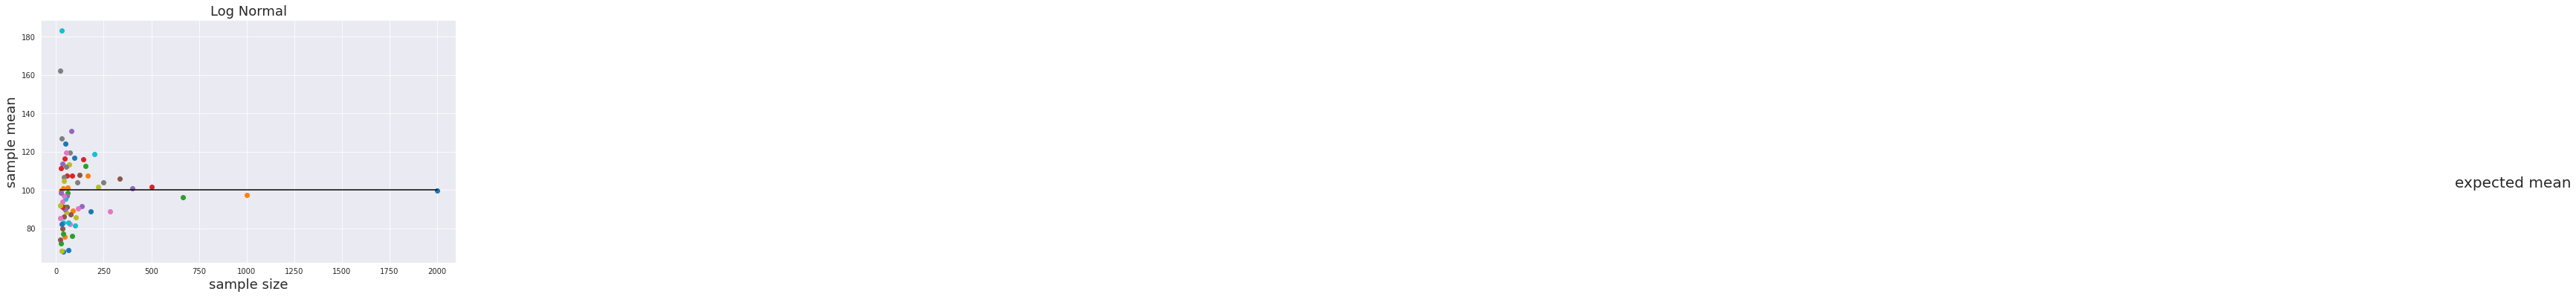

In [102]:
##your code here...
np.random.seed(555);
mydists[distributions[4]] = {};
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
for n in mysize:
    mydists[distributions[4]][n] = np.random.lognormal(mean = 4.0, sigma = sqrt(2*(log(100) - 4)), size = n) #all distributions have mean=df=100
    
# save the means for plotting later    

mydists[distributions[4]]['means'] = {}
# prepare the figure
axlognorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists[distributions[4]]:
    if not type(nn) == str: # needed because one element is "mean"
        mydists[distributions[4]]['means'][nn] = mydists[distributions[4]][nn].mean()
        #and plot it
        axlognorm_mu_n.plot(nn, mydists[distributions[4]]['means'][nn], 'o')
        axlognorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlognorm_mu_n.set_ylabel('sample mean', fontsize=18)
axlognorm_mu_n.set_title('Log Normal', fontsize=18)
axlognorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axlognorm_mu_n.text(axbinom_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

## Figure 7: The logarithmic normal distribution also follows the law of large numbers. The input parameters $\mu = 4$ and $\sigma = sqrt(2*[log(100)-4])$ ensures that the expected mean is 100.

# 661 students: fita  a Gaussian to the histogram of the means for each distribution

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram. 
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

Text(0, 0.5, 'N')

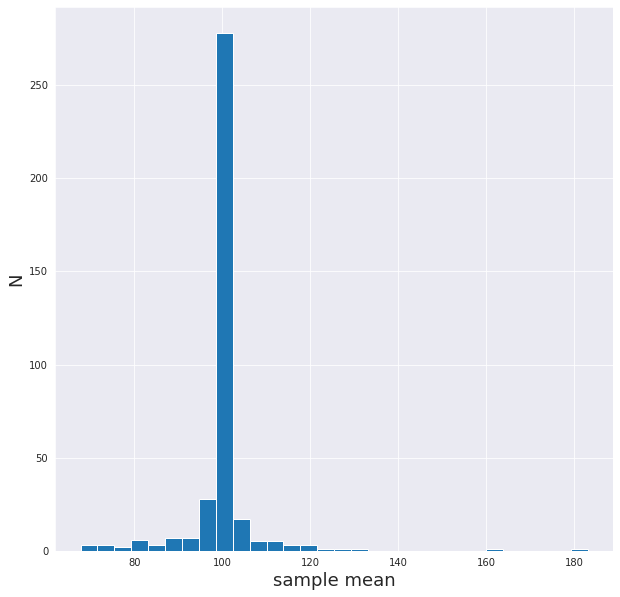

In [103]:
allmeans = list(mydists['chisq']['means'].values())

allmeans = [];

for d in distributions:
  for i in mydists[d]:
    if not type(i) == str:
      allmeans.append(mydists[d]['means'][i])




pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 8: Histogram of all the sample means for the 5 selected distributions. Here you can clearly see a well-defined gaussian distribuion centered at 100, with a fairly small standard deviation.

(array([  1.,   2.,   0.,   1.,   2.,   2.,   5.,   3.,   1.,   8.,   9.,
         33., 270.,  14.,   8.,   0.,   5.,   1.,   3.,   1.,   1.,   0.,
          0.,   0.,   0.,   2.,   0.,   1.,   0.,   2.]),
 array([ 58.15446435,  61.54415432,  64.93384429,  68.32353427,
         71.71322424,  75.10291421,  78.49260418,  81.88229415,
         85.27198412,  88.66167409,  92.05136406,  95.44105403,
         98.830744  , 102.22043397, 105.61012394, 108.99981391,
        112.38950388, 115.77919385, 119.16888383, 122.5585738 ,
        125.94826377, 129.33795374, 132.72764371, 136.11733368,
        139.50702365, 142.89671362, 146.28640359, 149.67609356,
        153.06578353, 156.4554735 , 159.84516347]),
 <a list of 30 Patch objects>)

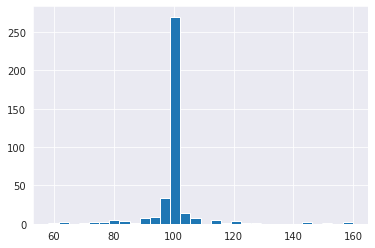

In [85]:
pl.hist(allmeans,bins=30)

And you can create your own Gaussian function to pass to curve_fit as this for example: 

In [16]:
def gaussian(x, mu, sigma....):
    ''' 
    REMEMBER TO WRITE A DOCSTRING THAT EXPLAINS WHAT A FUNCTION DOES EVERY TIME YOU WRITE A FUNCTION 
    https://www.python.org/dev/peps/pep-0257/
    '''

SyntaxError: ignored

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

In [ ]:
To fit the data you can use scipy.minimize

In [ ]:
from scipy import optimize
sp.optimize.minimize?

In [ ]:
sp.optimize.fmin?

In [ ]:
...